# Battery Consumption Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [1]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'
mpl.rcParams['figure.figsize'] = (7,5)

## Helper Functions

In [3]:
def get_merged_data(current_df, label_df):
    
    # Convert the timestamps to datetime objects
    current_df_copy = current_df.copy()
    label_df_copy = label_df.copy()

    current_df_copy['Time'] = pd.to_datetime(current_df_copy['Time'], format='%H:%M:%S.%f').dt.time
    label_df_copy['Timestamps'] = pd.to_datetime(label_df_copy['Timestamps'], format='%H:%M:%S.%f').dt.time

    # Remove the decimal point from timestamps
    current_df_copy['Time'] = current_df_copy['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
    label_df_copy['Timestamps'] = label_df_copy['Timestamps'].apply(lambda x: x.strftime('%H:%M:%S'))

    # Merge the dataframes based on the timestamp column
    merged_data = pd.merge(current_df_copy, label_df_copy, left_on='Time', right_on='Timestamps', how='left')
    merged_data.drop(['Timestamps'], axis=1, inplace=True)
    return merged_data

In [4]:
def plot_data(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)
    plt.show()

In [5]:
def plot_data_markers(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)

    for index, row in data.iterrows():
        if not pd.isna(row['Labels']):
            print(index)
            plt.axvline(x=index, color='r', linestyle='--')

    plt.show()

## Car Park Sensor

In [6]:
current_cps_df = pd.read_csv('./cps/cps_data.csv')
label_cps_df = pd.read_csv('./cps/timestamps.csv')

In [7]:
cps_merged_df = get_merged_data(current_cps_df, label_cps_df)

cps_merged_df

,Time,Current (mA),Labels
0,12:08:50,55.1,NaN
1,12:08:51,54.2,NaN
2,12:08:52,54.2,NaN
3,12:08:53,54.9,NaN
4,12:08:54,54.5,NaN
...,...,...,...
307,12:14:02,31.1,NaN
308,12:14:03,30.8,NaN
309,12:14:04,45.7,NaN
310,12:14:05,45.7,NaN


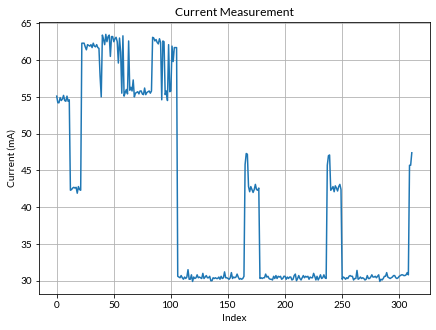

In [8]:
plot_data(cps_merged_df)

22
23
24
33
103
104
105
168
177
240


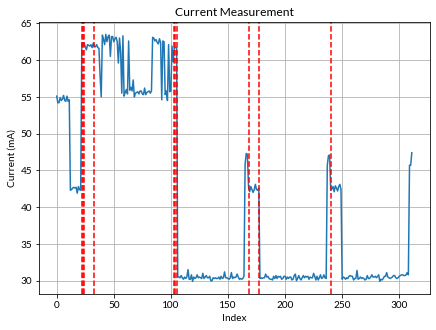

In [9]:
plot_data_markers(cps_merged_df)

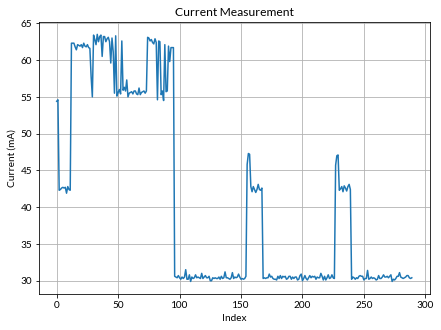

In [10]:
cps_cycle_df = cps_merged_df.drop(cps_merged_df.index[300:], axis=0)
cps_cycle_df = cps_cycle_df.drop(cps_cycle_df.index[0:10], axis=0)
cps_cycle_df = cps_cycle_df.reset_index()
plot_data(cps_cycle_df)

12
13
14
23
93
94
95
158
167
230


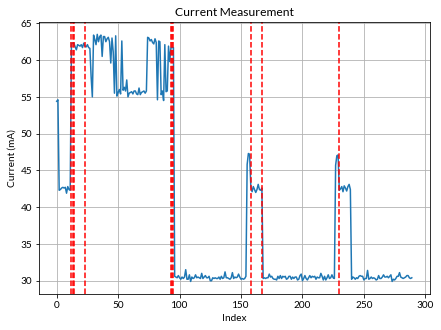

In [11]:
plot_data_markers(cps_cycle_df)

## Air Quality Monitoring System

In [12]:
current_aqms_df = pd.read_csv('./aqms/aqms_data.csv')
label_aqms_df = pd.read_csv('./aqms/timestamps.csv')

In [13]:
aqms_merged_df = get_merged_data(current_aqms_df, label_aqms_df)

aqms_merged_df

,Time,Current (mA),Labels
0,13:46:13,58.2,NaN
1,13:46:14,58.2,NaN
2,13:46:15,59.5,NaN
3,13:46:16,58.1,NaN
4,13:46:17,57.7,NaN
...,...,...,...
4358,15:00:41,47.3,NaN
4359,15:00:42,41.4,NaN
4360,15:00:43,41.9,NaN
4361,15:00:44,41.7,NaN


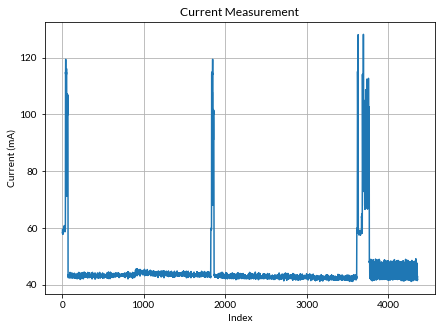

In [14]:
plot_data(aqms_merged_df)

11
35
36
47
65
66
67
1825
1830
1831
1842
1858
1860
1861
3617
3623
3624
3634
3765
3767
3768


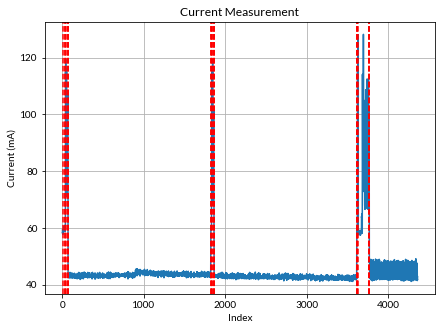

In [15]:
plot_data_markers(aqms_merged_df)

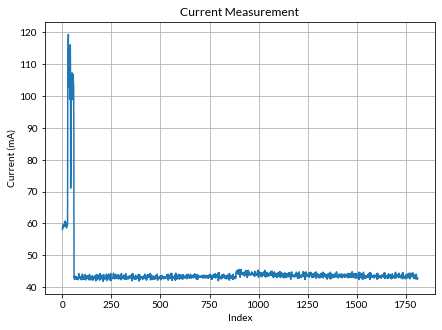

In [16]:
aqms_cycle_df = aqms_merged_df.drop(aqms_merged_df.index[1822:], axis=0)
aqms_cycle_df = aqms_cycle_df.drop(aqms_cycle_df.index[0:10], axis=0)
aqms_cycle_df = aqms_cycle_df.reset_index()
plot_data(aqms_cycle_df)

1
25
26
37
55
56
57


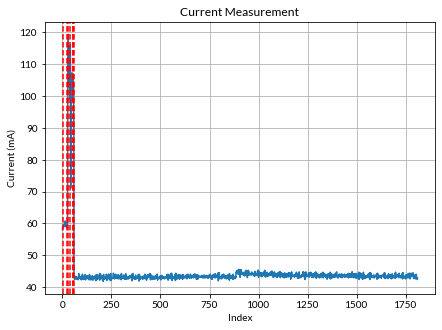

In [17]:
plot_data_markers(aqms_cycle_df)

## Fire Detection System

In [18]:
current_fds_df = pd.read_csv('./fds/fds_data.csv')
label_fds_df = pd.read_csv('./fds/timestamps.csv')

In [19]:
fds_merged_df = get_merged_data(current_fds_df, label_fds_df)

fds_merged_df

,Time,Current (mA),Labels
0,00:30:06,42.5,NaN
1,00:30:07,43.1,NaN
2,00:30:08,43.2,NaN
3,00:30:09,42.5,NaN
4,00:30:10,43.2,NaN
...,...,...,...
418,00:37:12,29.7,NaN
419,00:37:13,47.1,NaN
420,00:37:14,44.1,NaN
421,00:37:15,44.2,NaN


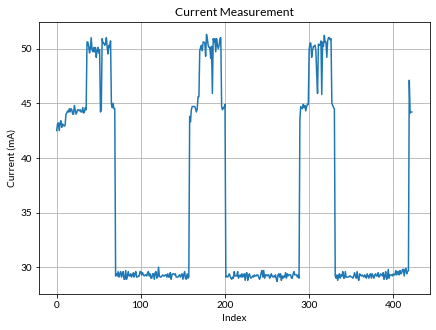

In [20]:
plot_data(fds_merged_df)

11
36
37
47
63
65
163
168
169
180
193
195
293
298
299
310
324
326


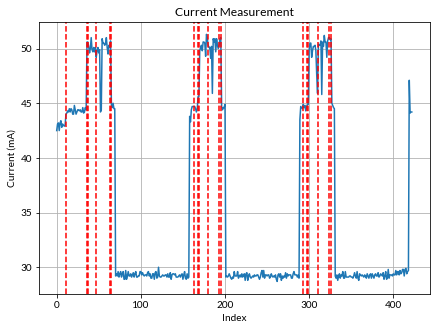

In [21]:
plot_data_markers(fds_merged_df)